<a href="https://www.kaggle.com/code/bhavkaur/kidney-stone-prediction?scriptVersionId=148328586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing Libraries**

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# **Loading Dataset**

In [86]:
df = pd.read_csv("/kaggle/input/kidneystone/kidney-stone-dataset.csv",index_col=[0])

In [87]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


### 1. Checking the Dimensions of Dataset.

In [88]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 90
Total number of attributes/columns present in the dataset is: 7


### 2. Fetching the Attributes Names.

In [89]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

### 3. Assigning More Suitable Column Names for better Analysis.

In [90]:
df.rename(columns={"gravity":"Urine_Gravity","ph":"Urine_pH","osmo":"Osmolality","cond":"Conductivity","urea":"Urea",
                  "calc":"Calcium","target":"Target"},inplace=True)

In [91]:
df.columns

Index(['Urine_Gravity', 'Urine_pH', 'Osmolality', 'Conductivity', 'Urea',
       'Calcium', 'Target'],
      dtype='object')

### 4. Generating Basic Information of the data.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Urine_Gravity  90 non-null     float64
 1   Urine_pH       90 non-null     float64
 2   Osmolality     90 non-null     int64  
 3   Conductivity   90 non-null     float64
 4   Urea           90 non-null     int64  
 5   Calcium        90 non-null     float64
 6   Target         90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.6 KB


### 5. Computing Total No. of Missing Values.

In [93]:
df.isnull().sum()#.to_frame().rename(columns={0:"Total No. of Missing Values"})

Urine_Gravity    0
Urine_pH         0
Osmolality       0
Conductivity     0
Urea             0
Calcium          0
Target           0
dtype: int64

### 6. Checking Duplicate Records.

In [94]:
df.duplicated().any()

False

### 7. Performing Descriptive Statistical Analysis.

In [95]:
    df.describe()

,Urine_Gravity,Urine_pH,Osmolality,Conductivity,Urea,Calcium,Target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


# **EDA**

## 1. Visualizing Urnine_Gravity Feature Distribution & Relation.

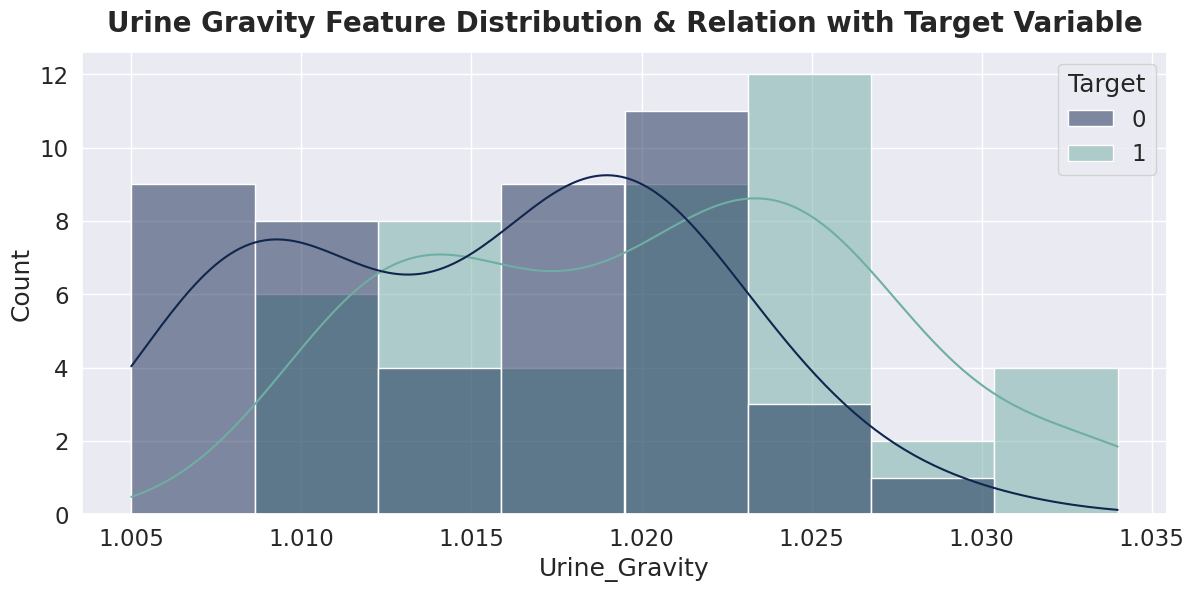

In [96]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urine_Gravity"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urine Gravity Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)

plt.show()

## 2. Visualizing Urine_pH Feature Distribution & Relation. 

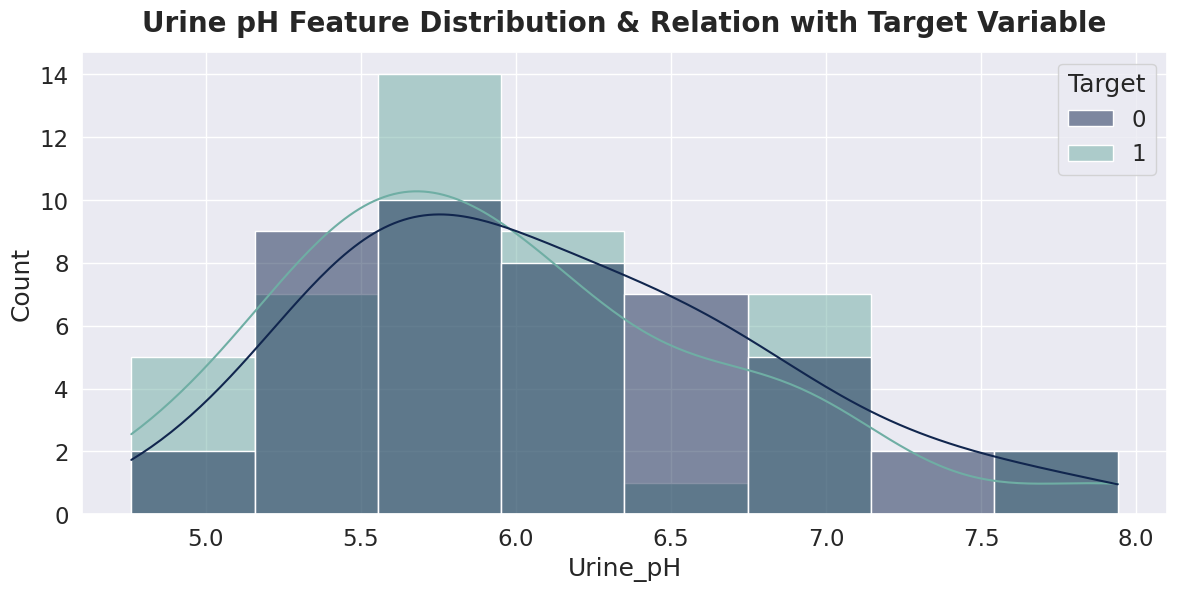

In [97]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urine_pH"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urine pH Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.show()

## 3. Visualizing Osmolality Feature Distribution & Relation.

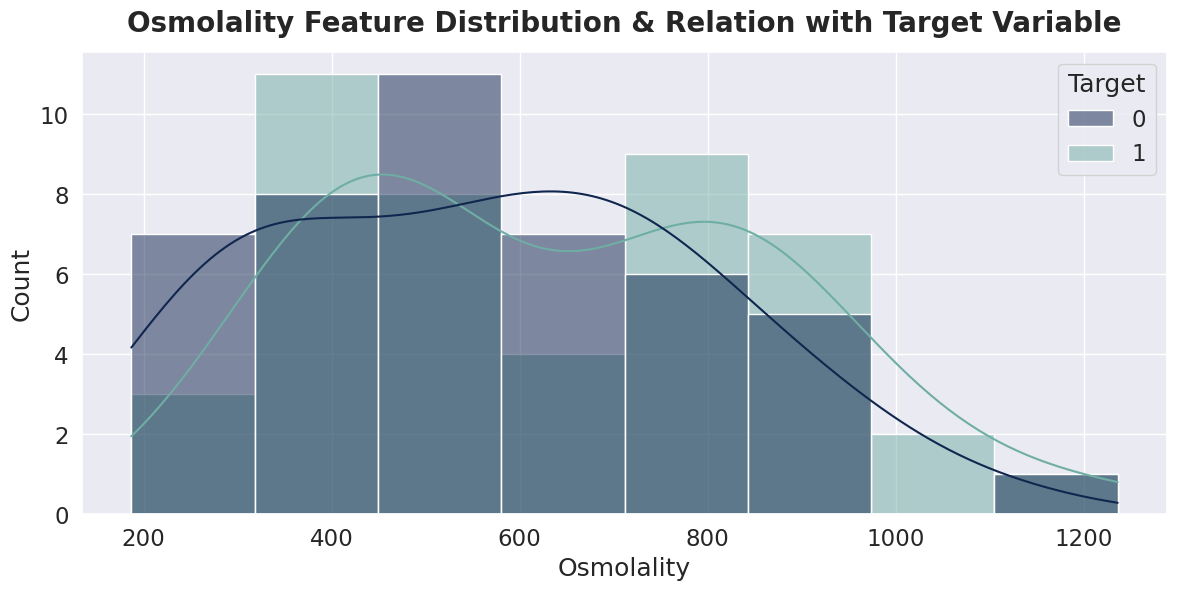

In [98]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Osmolality"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Osmolality Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.show()

## 4. Visualizing Conductivity Feature Distribution & Relation.

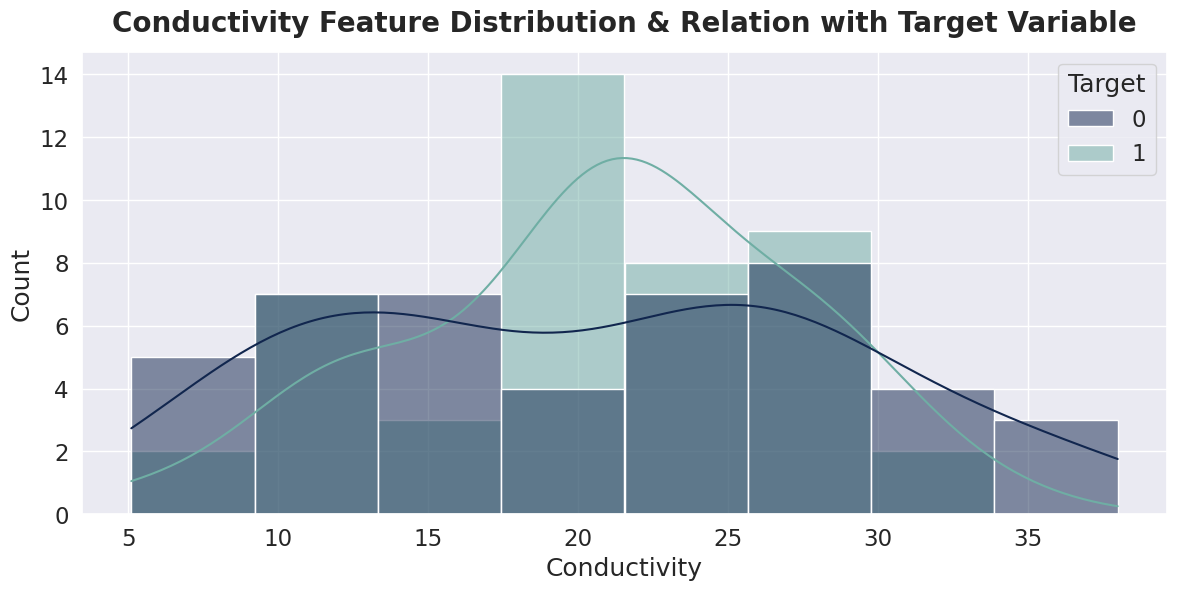

In [99]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Conductivity"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Conductivity Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.show()

## 5. Visualizing Urea Feature Distribution & Relation. 

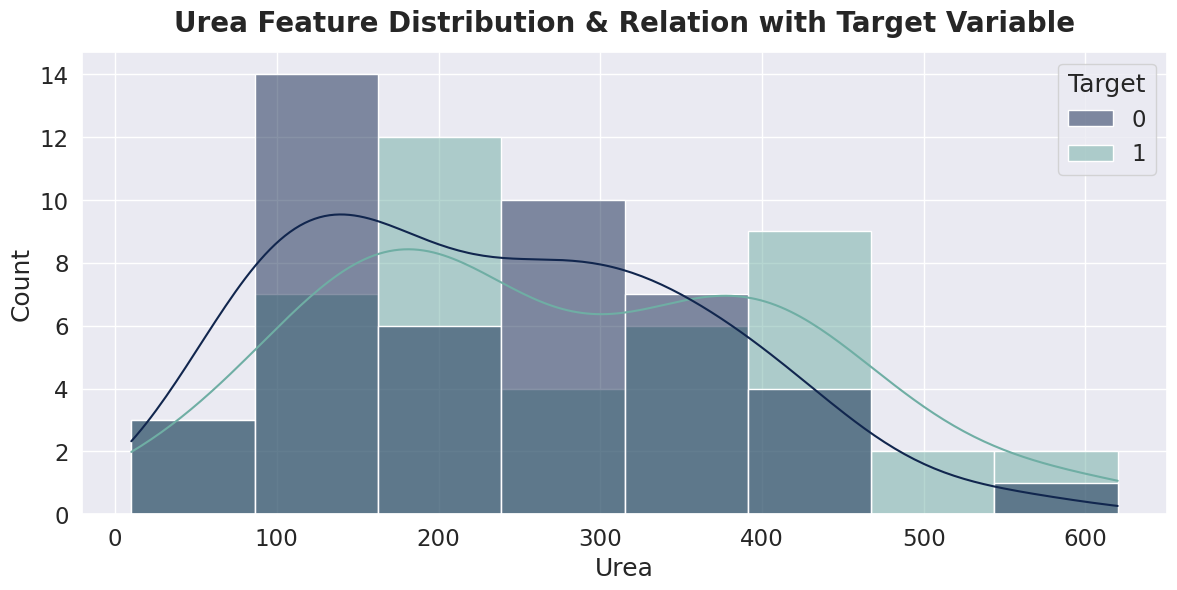

In [100]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urea"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urea Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.show()

## 6. Visualizing Calcium Feature Distribution & Relation.

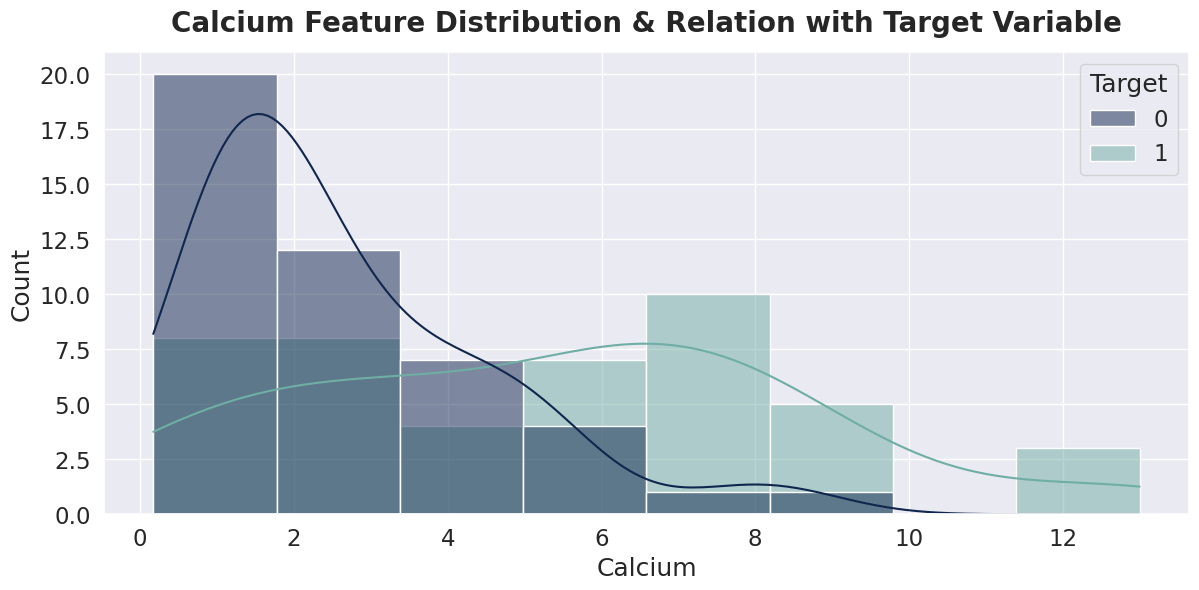

In [101]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Calcium"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Calcium Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.show()

## 7. Finidng Realtion between "Urine_Gravity w.r.t Other Features.

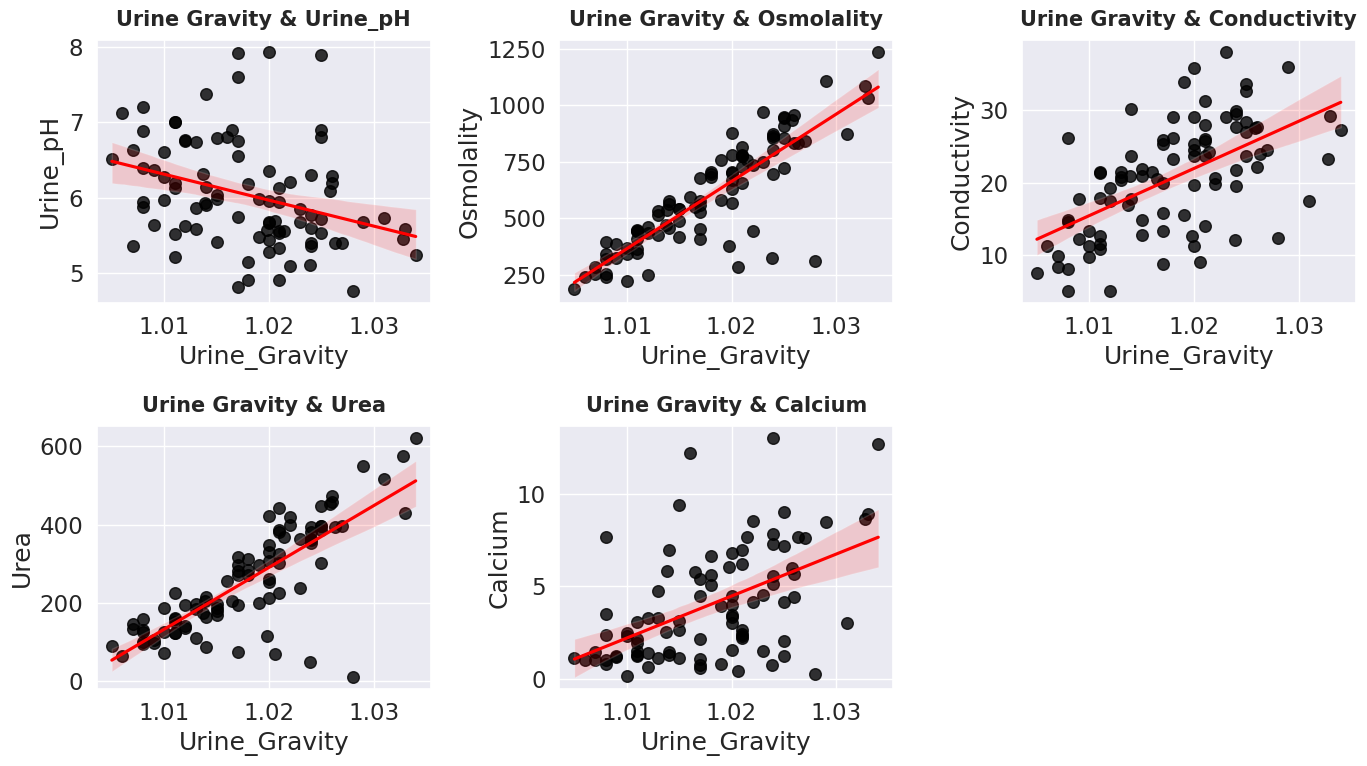

In [102]:
cols = df.columns.tolist()
cols.remove("Urine_Gravity")
cols.remove("Target")


plt.figure(figsize=(14,8))
for index,col in enumerate(cols):
    plt.subplot(2,3,index+1)
    sns.regplot(x="Urine_Gravity",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Urine Gravity & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

# Data Preprocessing

### 1. Segregating Features & Labels for Model Training.

In [103]:
X = df.drop(columns=["Target"])
y = df["Target"]

### 2. Splitting Data For Model Training & Testing.

In [104]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (72, 6)
Shape of x_test is:  (18, 6)
Shape of y_train is: (72,)
Shape of y_test is:  (18,)


## Model Creation using DecisionTree

In [106]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

###  Computing Model Accuracy.

In [107]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 66.67 %


###  Model Evaluation using Confusion Matrix.

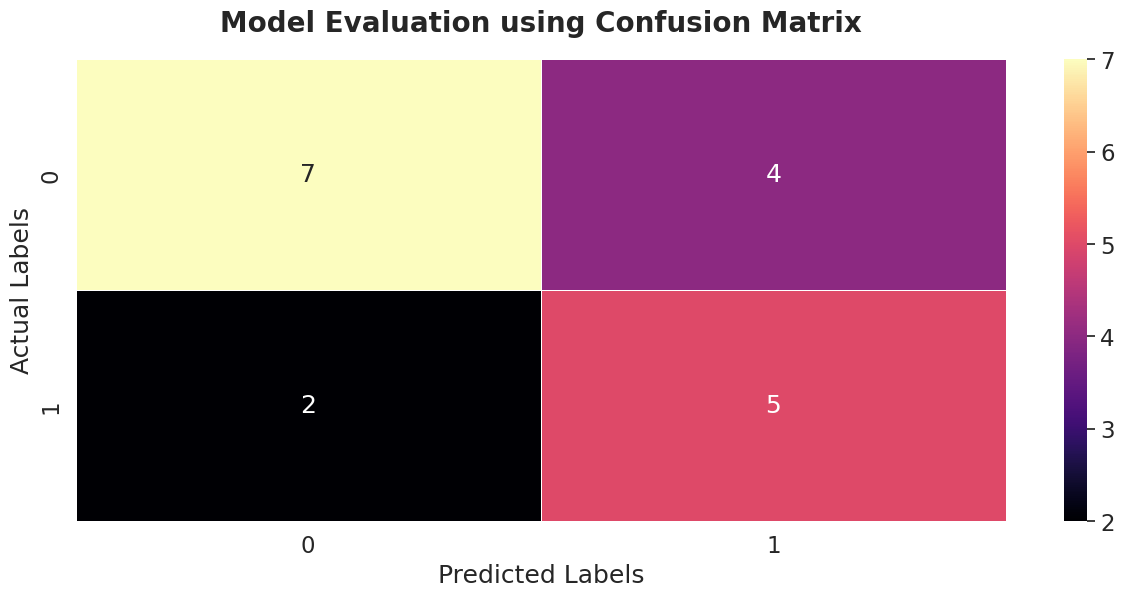

In [108]:
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True,cmap="magma")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# Model Creation using RandomForest

In [109]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

### Computing Model Accuracy.

In [110]:
y_train_pred = rfc.predict(x_train)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 88.89 %


### Model Evaluation using Confusion Matrix.

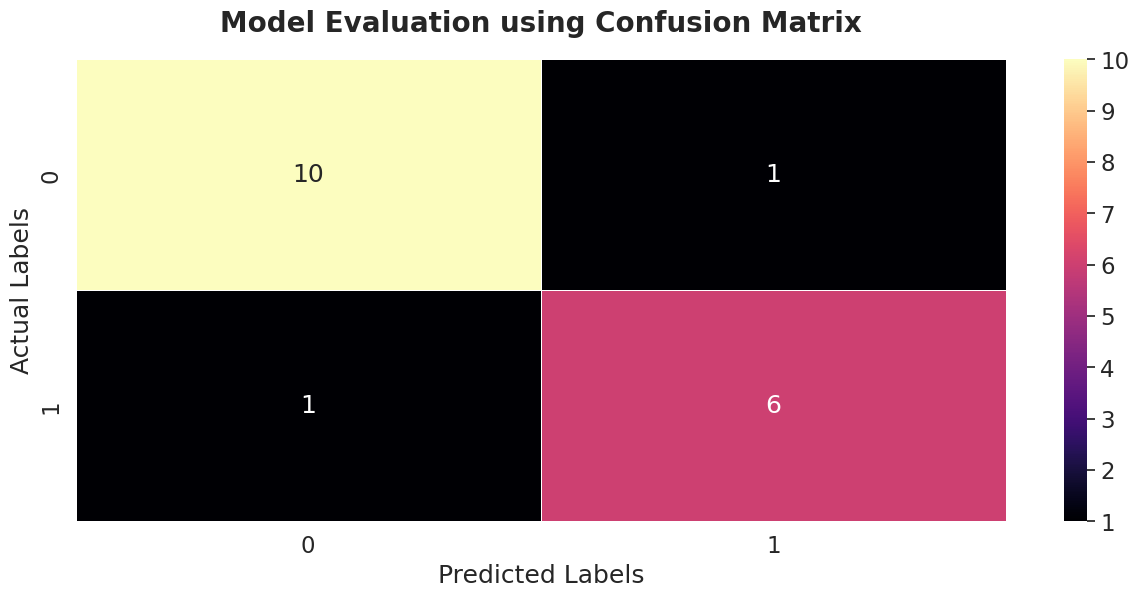

In [111]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True,cmap="magma")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# Conclusion 